In [46]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import house_sales_data as hsd
from sklearn.model_selection import train_test_split

In [47]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data["price"]
beds = data["beds"]
area = data["area"]

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [48]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    errs = np.zeros(max_iteration)

    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= learning_rate * grad
    return theta, errs

In [65]:
# implementing GD using vectorized operation
def gradient_descent1(x,y,max_iter,lr):
    m,n = x.shape
    theta = np.zeros((n,1))
    y = y.reshape(m,1)
    costs = []
    for i in range(max_iter):
        pred = x @ theta
        grad_theta = (2/m)*(x.T @ (pred - y))
        theta = theta - lr * grad_theta 
        costs.append(sum((pred - y)**2))
    return theta,costs

In [56]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    minX = X[:,normalize_cols].min(axis=0)
    maxX = X[:,normalize_cols].max(axis=0)
    miny = y.min()
    maxy = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - minX) / (maxX - minX)
    y[:] = (y - miny) / (maxy - miny)
    return X, y, minX, maxX, miny, maxy

In [57]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    p1 = (y - y_hat).T
    p2 = (y - y_hat)
    return (1/len(y))*(p1 @ p2)

In [58]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
x = X_train; y = y_train

In [66]:
# call gradient descent and fine-tune your learning rate
theta,costs = gradient_descent1(x,y,2500,0.01)

In [67]:
theta

array([[0.50660755],
       [0.16850882],
       [0.05519877]])

In [62]:
def evaluation_metric(y,y_hat):
    p1 = (y - y_hat).Tprint(theta.shape,X_train.shape)

(3, 1) (619, 3)


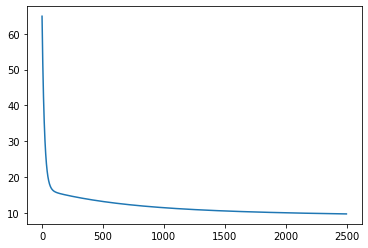

In [68]:
# plot cost vs iterations 
plt.plot(costs)
# note gradient descent return costs for all iterations

In [70]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000

err =[]
for i in range(500,2000,100):
    theta,costs = gradient_descent(X_train,y_train,i,0.01)
    #theta = theta.reshape(len(theta),1)
    err.append(evaluation_metric(y_test,X_test@theta))
# Note the best value of evaluation metric you get

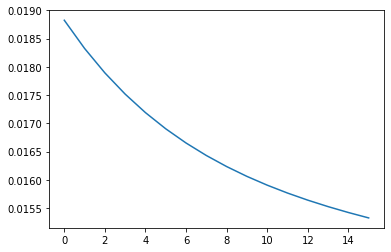

In [72]:
plt.plot(err)

In [73]:
# compare your solution with scikit-learn library
from sklearn.linear_model import LinearRegression

In [74]:
# Create linear regression object
model = LinearRegression(fit_intercept=True, normalize=False)

In [75]:
# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Predict on test set and print evaluation metric
# How much does it differ by from 
y_pred = model.predict(X_test)
y_test1 = X_test@theta
print(evaluation_metric(y_test,y_pred),evaluation_metric(y_test, y_test1))

0.012602503305118876 0.015329118600967551
